In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
visa_df=pd.read_csv(r"C:\Users\avina\OneDrive\Documents\NareshIT\DATA SCIENCE & AI\Data files\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


** Bi Variate analysis**

- Analyse the two variables
- Two categorical columns
- Two numerical columns
- One categorical and one numerical

**Categorical vs Categorical**

In [8]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [9]:
cat=visa_df.select_dtypes(include='object').columns  #categorical coloummns
cat 

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [10]:
cat=visa_df.select_dtypes(exclude='object').columns  #Numerical coloummns
cat 

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


we will work on **continent** and **case status**

In [13]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [15]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**How many asia people got the visa Certified**

In [23]:
con1= (visa_df['continent']=="Asia")
con2=(visa_df['case_status']=="Certified")
con=con1&con2
len(visa_df[con])
print(f"The number of employees visa certified are:{len(visa_df[con])}")

The number of employees visa certified are:11012


In [25]:
con1= (visa_df['continent']=="Asia")
con2=(visa_df['case_status']=="Denied")
con=con1&con2
len(visa_df[con])
print(f"The number of employees visa denied are:{len(visa_df[con])}")

The number of employees visa denied are:5849


In [89]:
keys=visa_df['continent'].unique()
certified_list=[]
denied_list=[]
for i in keys:
    con1=(visa_df['continent']==i)
    con2=(visa_df['case_status']=="Certified")
    con3=(visa_df['case_status']=="Denied")
    certi_con=con1&con2
    denied_con=con1&con3
    certified_list.append(len(visa_df[certi_con]))
    denied_list.append(len(visa_df[denied_con]))                 

pd.DataFrame(zip(certified_list,denied_list),
             columns=["Certified_list","Denied_list"],
             index=keys)

,Certified_list,Denied_list
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**
- cross tab will take two arguments
  - First argument: index
  - Second argument: column

In [63]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1= pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

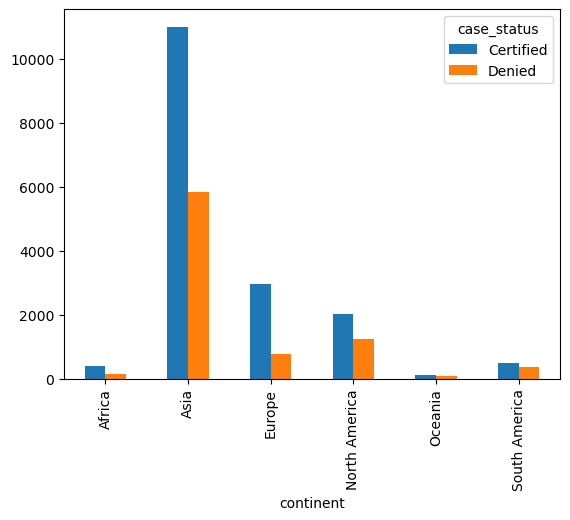

In [66]:
result1.plot(kind="bar")

In [68]:
col1=visa_df['continent']
col2=visa_df['case_status']
result2= pd.crosstab(col2,col1)
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='case_status'>

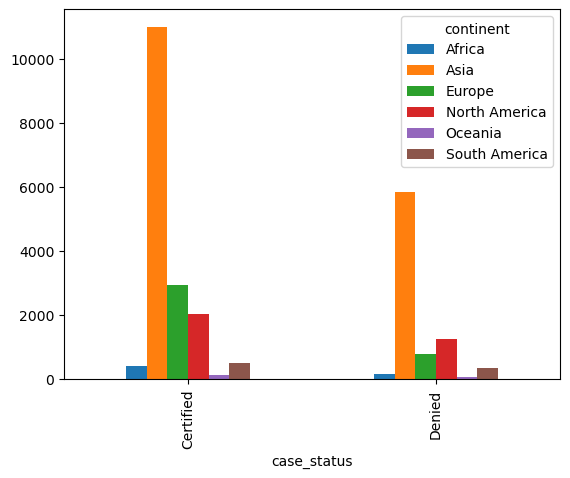

In [69]:
result2.plot(kind="bar")

In [84]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
result4=pd.crosstab(col,col3)
result4

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

**Numerical vs Numerical**

- in order to plot numerical vs numerical we need to use scatter plots
- Scatter plots will give the relation between two numerical columns
- it is under matplotlib

$plt.scatter$

**it is y=x plot**

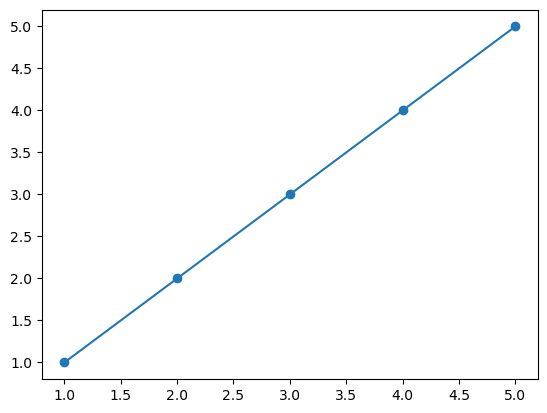

In [92]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()


**y=x*x**

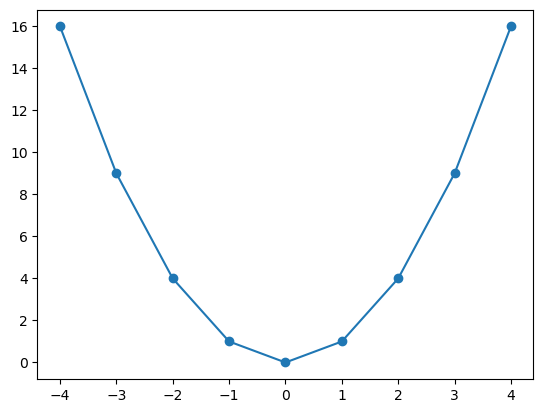

In [95]:
x=[i for i in range (-4,5)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [ ]:
**Scatter plot-1**

- no_of_employees and yr_of_estab

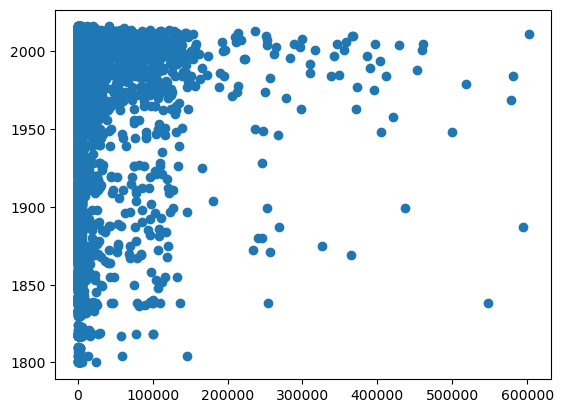

In [98]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

**Observation**: no relation

In [ ]:
**Scatter plot-2**

- no_of_employees and prevailing_wage

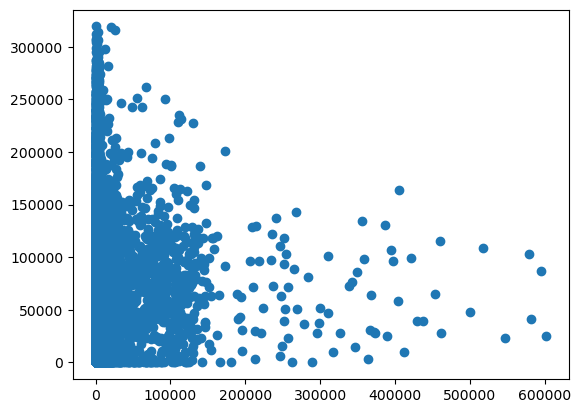

In [101]:
con1=visa_df['no_of_employees']
con2=visa_df['prevailing_wage']
plt.scatter(con1,con2)

**Observation**: no relation

In [ ]:
**Scatter plot-3**

- yr_of_estab and prevailing_wage

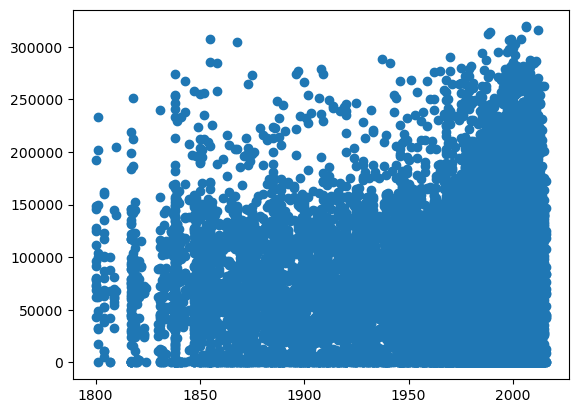

In [102]:
con1=visa_df['yr_of_estab']
con2=visa_df['prevailing_wage']
plt.scatter(con1,con2)

**observation**: no relation

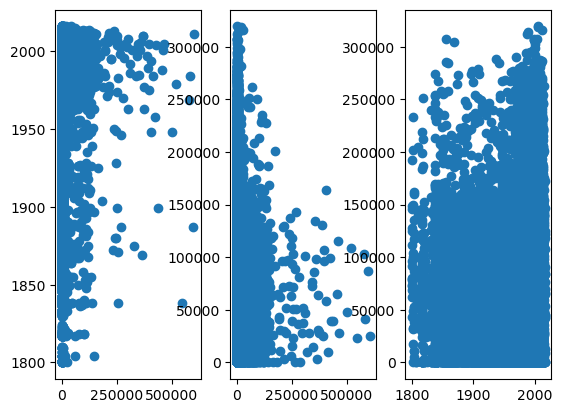

In [107]:
plt.figure(figure=(14,3))
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)

con1=visa_df['no_of_employees']
con2=visa_df['prevailing_wage']
plt.subplot(1,3,2).scatter(con1,con2)

con1=visa_df['yr_of_estab']
con2=visa_df['prevailing_wage']
plt.subplot(1,3,3).scatter(con1,con2)

**correlation coefficient**

<img src="https://miro.medium.com/v2/resize:fit:1010/1*5aHs9XkcreLtmOGsdwGCtA.png" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 505px; height: 136px; margin: 6.5px 0px; width: 202px;" alt="Pearson's R and Coefficient of Determination | by Faraz Hashmi | Medium" jsname="kn3ccd" aria-hidden="false">

- perason correlation coefficient will give the amount of relation between variables
- it is denoted with r
- r varies from -1 to 1
- for positive relation r varies from 0 to 1
- for negative relation r varies from -1 to 0
- for no relation r approximate 0
- in python code we have **corr** fuction under pandas
   - This will give covariance matrix
   - we already discussed covariance matrix is rows and columns type
   - in this data we have 3 numerical columns
   - so we will get 3*3  9 values
   - all trace of the matrix represents variance
   - Upper triangle and lower triangle represents co variance

In [111]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Observations**

- The correlation value between no_of_employees and yr_of_estab approximately zero
    - which indicates no relation

- The correlation value between no_of_employees and prevailing_wage approximately zero
    - which indicates no relation

- The correlation value between yr_of_estab and yr_of_estab approximately zero
    - which indicates no relation